# Mode of transport prediction
**Group no. 1** (Praveen, Kunal, Debalina, Anup, Sahil)

## Table of Contents
1. **[Introduction](#introduction)**
2. **[Data Understanding](#data_understanding)**
3. **[EDA - Univariate Analysis](#univariate_analysis)**
4. **[EDA - Bivariate Analysis](#bivariate_analysis)**
5. **[Missing value Treatment](#missing)**
5. **[Outlier Treatment](#outlier_treatment)**
6. **[Variable Importance Check](#variable_importance_check)**
7. **[Data Preparation for Modelling](#data_preparation)**
8. **[Modelling](#modelling)**
 - **[KNN](#knn)**
 - **[Naive Bayes](#nb)**
 - **[Logistic Regression](#lr)**
 - **[Bagging](#bag)**
 - **[Boosting](#boost)**
10. **[Variable Importance](#variable_importance)**
11. **[Conclusion](#conclusion)**

<a id='introduction'></a>


## Introduction
This project aims to understand what mode of transport employees prefers to commute to their office. We need to predict whether or not an employee will use Car as a mode of transport and which variables are a significant predictor behind this decision?
### Variable description
1. **Age** - Age of employees in years
2. **Gender** - Gender of Employees (Male or Female)
3. **Engineer** - 1 if employee is Engineer, 0 if not
4. **MBA** - 1 if employee is MBA, 0 if not
5. **Work Exp** - Work experience of employees in years
6. **Salary** - Salary of employees
7. **Distance** - Distance from home to office
8. **license** - 1 if employee has driving license, 0 if not
9. **Transport** - Mode of transport used by employees (Dependent variable)


In [1]:
# Import important modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working directory
os.chdir(r"E:\PGP BA - greatlearning\Resd 6\Machine Learning\Group Assignment")

In [3]:
# Load dataset
data = pd.read_csv("Cars.csv")

In [4]:
# Make copy of dataset
cars = data.copy()

<a id='data_understanding'></a>

## Dataset Understanding

In [5]:
# Check dataset information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
Age          444 non-null int64
Gender       444 non-null object
Engineer     444 non-null int64
MBA          443 non-null float64
Work Exp     444 non-null int64
Salary       444 non-null float64
Distance     444 non-null float64
license      444 non-null int64
Transport    444 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.3+ KB


- 444 employee records
- 9 variables (Dependent variable is **Transport** and rest are Independent variables)
- No missing values excep 1 value in **MBA** variable
- 4 variables with int64 data type
- 3 variables with float64 data type
- 2 variables with object data type

In [6]:
# Change data type as per data description
cars["Engineer"] = cars["Engineer"].astype("object")
cars["MBA"] = cars["MBA"].astype("object")
cars["license"] = cars["license"].astype("object")

In [7]:
# Check data summary for numerical variables
cars.describe()

,Age,Work Exp,Salary,Distance
count,444.000000,444.000000,444.000000,444.000000
mean,27.747748,6.299550,16.238739,11.323198
std,4.416710,5.112098,10.453851,3.606149
min,18.000000,0.000000,6.500000,3.200000
25%,25.000000,3.000000,9.800000,8.800000
50%,27.000000,5.000000,13.600000,11.000000
75%,30.000000,8.000000,15.725000,13.425000
max,43.000000,24.000000,57.000000,23.400000


**1. Age**
- On an average employee age is 27.7 years, median age is 27 years.
- Standard deviation is around 4 years with minimum of 18 years and maximum age of 43 years.
- 75% of employees are below 30 years of age.

**2. Work Exp**
- On an average employee work experience is 6 and median is 5.
- Standard deviation is around 5 with minimum of 0 and maximum of 24.
- 75% of employees have work experience below 8.

**3. Salary**
- On an average employee salary is 16 and median is 13.6.
- Standard deviation is around 10.45 with minimum of 6.5 and maximum of 57.
- 75% of employees have salary below 15.7.

**4. Distance**
- Both mean and median distance traveled from home to office is  around 11.
- Standard deviation is around 3.6 with minimum distance of 3 and maximum of 23.
- 75% of employees travel distance of less than 13.

In [8]:
# Check data summarry for categorical variables
cars.describe(include="O")

,Gender,Engineer,MBA,license,Transport
count,444,444,443.0,444,444
unique,2,2,2.0,2,3
top,Male,1,0.0,0,Public Transport
freq,316,335,331.0,340,300


**1. Gender**
- Frequency of **'Male'** is 316 out of 444 records

**2. Engineer**
- Frequency of **'Engineer'** is 335 out of 444 records 

**3. MBA**
- Frequency of **'non MBA'** is 331 out of 444 records and 1 missing value

**4. license**
- 340 employees do not have license out of 444 records

**5. Transport**
- Frequency of employees traveling through **'Public Transport'** is 300 out of 444 records

<a id='univariate_analysis'></a>

## EDA - Univariate Analysis

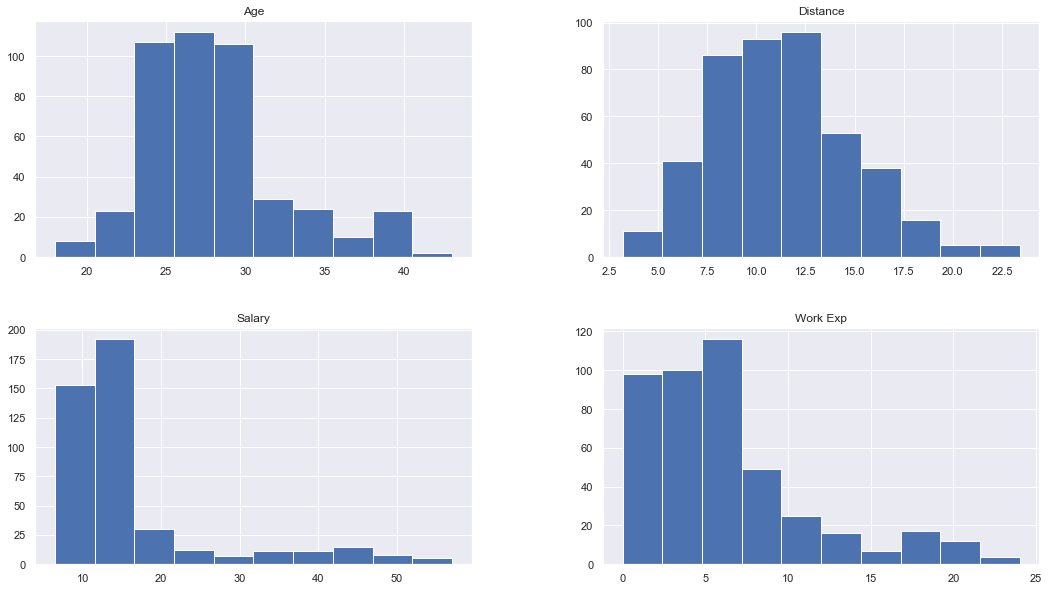

In [9]:
# Check histogram for numerical variables
cars.hist(figsize=(18,10))
plt.show()

- **Age** variable looks right skewed with most of the employees between the age of 23 to 30 years.
- **Distance** variable looks slightly right skewed with most of the employees traveling distance between 7.5 to 13.
- **Salary** variable looks right skewed with most of the employees earning salary less than 17.5.
- **Work Exp** variable looks right skewed with most of the employees having work experience between 0 to 8 years.

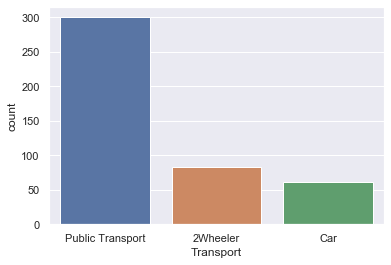

In [10]:
# Check frequency of classes in categorical variables
# Barplot for Transport - dependent variable
sns.countplot(cars["Transport"])
plt.show()

- In depandent variable **Transport**, classes are not balanced.
- Class **'Public Transport'** is 68%
- Class **'2Wheeler Transport'** is 18%
- Class **'Car'** is 14%

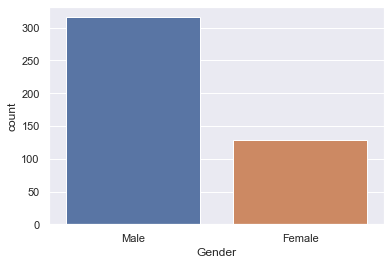

In [11]:
# Barplot for Gender
sns.countplot(cars["Gender"])
plt.show()

- In variable **Gender**, classes are not balanced.
- Class **'Male'** is 71%
- Class **'Female'** is 29% 

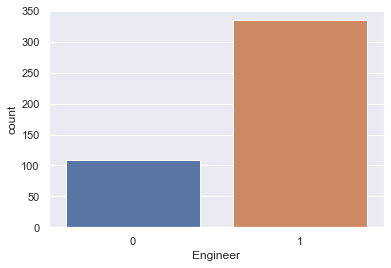

In [12]:
# Barplot for Engineer
sns.countplot(cars["Engineer"])
plt.show()

- In variable **Engineer**, classes are not balanced.
- Class **'0'** is 24% (Non Engineer employees)
- Class **'1'** is 76% (Engineer employees)

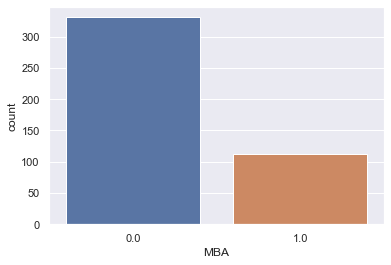

In [13]:
# Barplot for MBA
sns.countplot(cars["MBA"])
plt.show()

- In variable **MBA**, classes are not balanced.
- Class **'0'** is 75% (Non MBA employees)
- Class **'1'** is 25% (MBA employees)

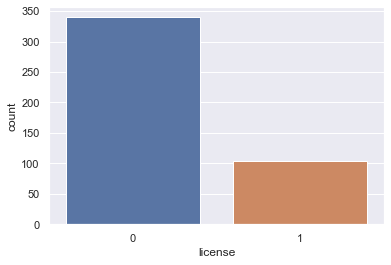

In [14]:
# Barplot for license
sns.countplot(cars["license"])
plt.show()

- In variable **license**, classes are not balanced.
- Class **'0'** is 77% (Employees dont have license)
- Class **'1'** is 23% (Employees have license)

<a id='bivariate_analysis'></a>

## EDA - Bivariate Analysis

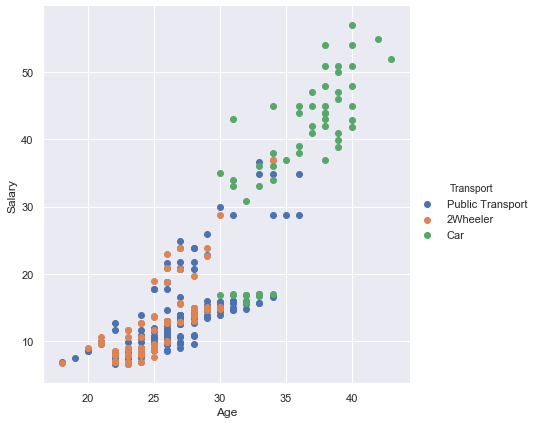

In [15]:
# Check relationship between Age and Salary with respect to Transport
sns.FacetGrid(cars, hue="Transport", size=6).map(plt.scatter, "Age", "Salary").add_legend()
plt.show()

- Employees traveling in **Car** are above the **Age** of 30 and mostly getting **Salary** more than 30.
- Although some employees who travel in **Car** and are above the **Age** of 30 are getting **Salary** between15 to 18.
- Positive linear relation ship is their between **Age** and **Salary**.

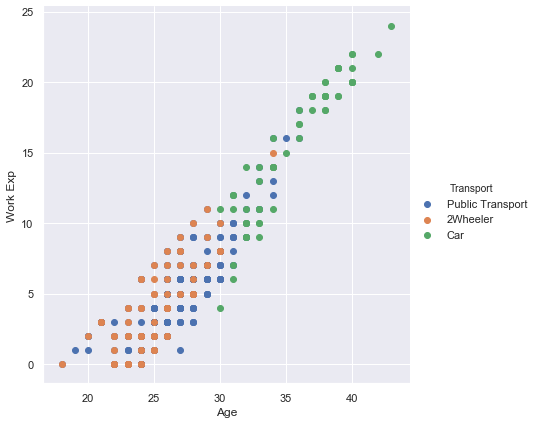

In [16]:
# Check relationship between Age and Work Exp with respect to Transport
sns.FacetGrid(cars, hue="Transport", size=6).map(plt.scatter, "Age", "Work Exp").add_legend()
plt.show()

- Employees traveling in **Car** are above the **Age** of 30 and mostly have **Work Exp** more than 6.
- Although one employee who travel in **Car** and are above the **Age** of 30 have **Work Exp** of 4.
- Positive linear relation ship is their between **Age** and **Work Exp**.

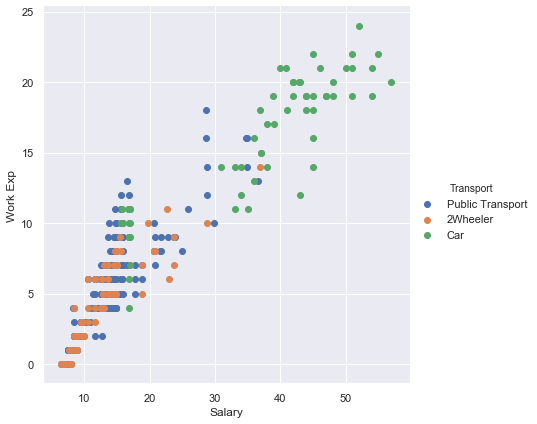

In [17]:
# Check relationship between Salary and Work Exp with respect to Transport
sns.FacetGrid(cars, hue="Transport", size=6).map(plt.scatter, "Salary", "Work Exp").add_legend()
plt.show()

- Positive linear relation ship is their between **Salary** and **Work Exp**.

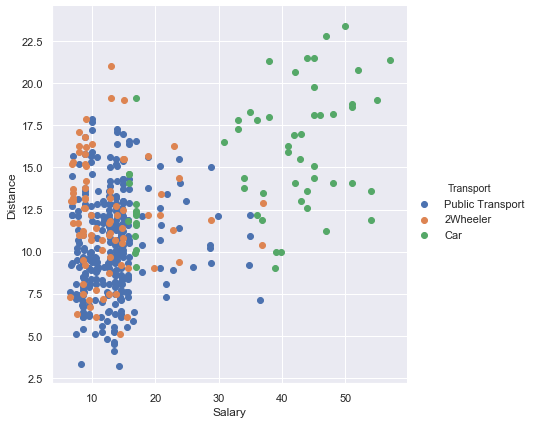

In [18]:
# Check relationship between Salary and Work Exp with respect to Transport
sns.FacetGrid(cars, hue="Transport", size=6).map(plt.scatter,  "Salary","Distance").add_legend()
plt.show()

- Employees traveling distance of more than 9 are using **Car**.
- No linear relation ship is their between **Salary** and **Distance**.

In [19]:
# Check correlation between independent variables
cars.corr()

,Age,Work Exp,Salary,Distance
Age,1.000000,0.932236,0.860673,0.352872
Work Exp,0.932236,1.000000,0.931974,0.372735
Salary,0.860673,0.931974,1.000000,0.442359
Distance,0.352872,0.372735,0.442359,1.000000


- High positive correlation of 93% between **Age** and **Work Exp**
- High positive correlation of 86% between **Age** and **Salary**
- High positive correlation of 93% between **Work Exp** and **Salary**
- Correlation between **Distance** and other variables is low.

In [20]:
# Get numerical variable list
cars.select_dtypes(exclude="object").columns.tolist()

['Age', 'Work Exp', 'Salary', 'Distance']

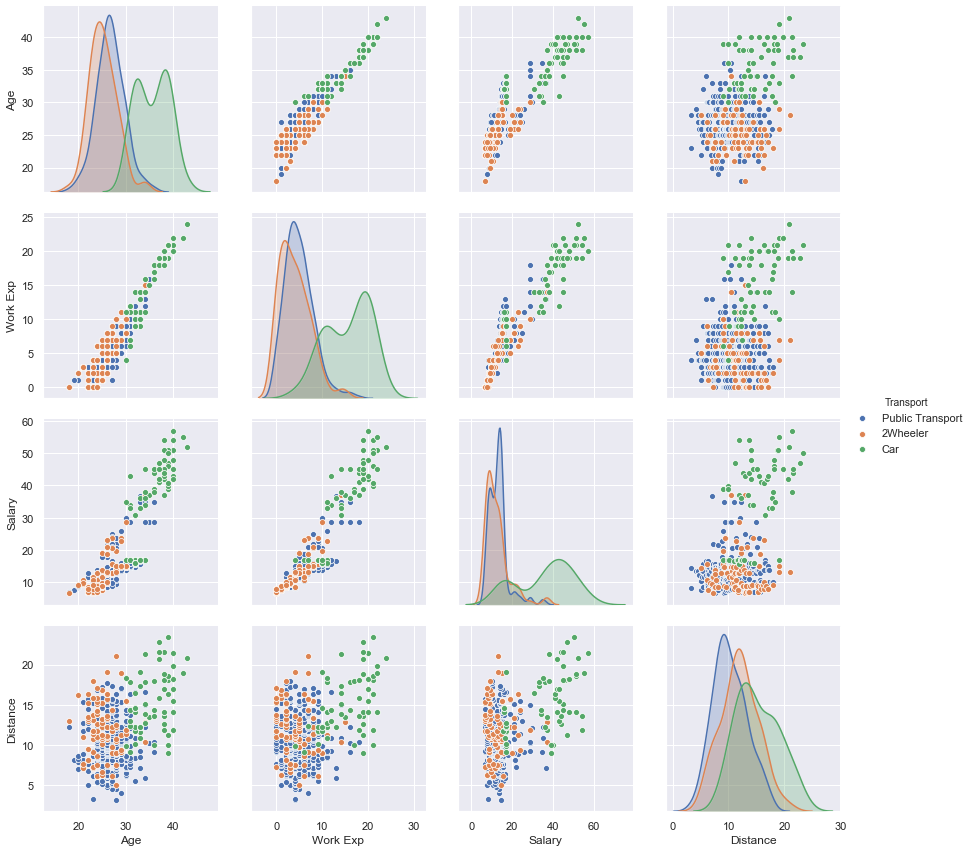

In [21]:
# Visualize the correlation with pair plot
attributes = cars[['Age', 'Work Exp', 'Salary', 'Distance', 'Transport']]
sns.pairplot(attributes, hue="Transport", size=3)
plt.show()

In [22]:
# Check relationship between dependent and categorical variables
# Transport vs Gender
pd.crosstab(index     = cars["Transport"],
            columns   = cars["Gender"],
            margins   = True,
            normalize = "index" )

Gender,Female,Male
Transport,,
2Wheeler,0.457831,0.542169
Car,0.213115,0.786885
Public Transport,0.256667,0.743333
All,0.288288,0.711712


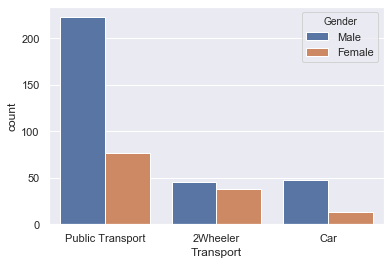

In [23]:
# Barplot of Transport with respect to Gender
sns.countplot("Transport", hue="Gender", data=cars)
plt.show()

- 79% of Male  and only 21% Female employees uses **Car** for travel.
- 54% of Male and 46% Female employees uses **2Wheeler Transport** for travel.
- 74% of Male  and only 26% Female employees uses **Public Transport** for travel.

In [24]:
# Transport vs Engineer
pd.crosstab(index     = cars["Transport"],
            columns   = cars["Engineer"],
            margins   = True,
            normalize = "index" )

Engineer,0,1
Transport,,
2Wheeler,0.277108,0.722892
Car,0.147541,0.852459
Public Transport,0.256667,0.743333
All,0.245495,0.754505


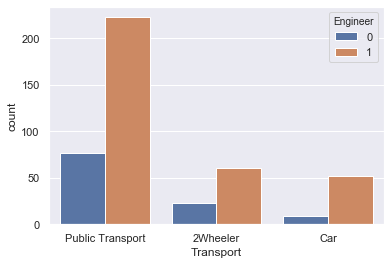

In [25]:
# Barplot of Transport with respect to Engineer
sns.countplot("Transport", hue="Engineer", data=cars)
plt.show()

- 85% of Engineers and only 15% non Engineer employees uses **Car** for travel.
- 72% of Engineers and 28% non Engineer employees uses **2Wheeler Transport** for travel.
- 74% of Engineers  and only 26% non Engineer employees uses **Public Transport** for travel.

In [26]:
# Transport vs MBA
pd.crosstab(index     = cars["Transport"],
            columns   = cars["MBA"],
            margins   = True,
            normalize = "index" )

MBA,0.0,1.0
Transport,,
2Wheeler,0.795181,0.204819
Car,0.803279,0.196721
Public Transport,0.722408,0.277592
All,0.747178,0.252822


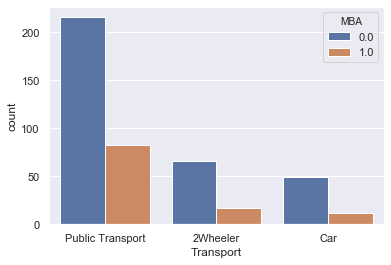

In [27]:
# Barplot of Transport with respect to Engineer
sns.countplot("Transport", hue="MBA", data=cars)
plt.show()

- 80% of non MBA and only 20% MBA employees uses **Car** for travel.
- 80% of non MBA and 20% MBA employees uses **2Wheeler Transport** for travel.
- 72% of non MBA  and only 28% MBA employees uses **Public Transport** for travel.

In [28]:
# Transport vs license
pd.crosstab(index     = cars["Transport"],
            columns   = cars["license"],
            margins   = True,
            normalize = "index" )

license,0,1
Transport,,
2Wheeler,0.722892,0.277108
Car,0.213115,0.786885
Public Transport,0.890000,0.110000
All,0.765766,0.234234


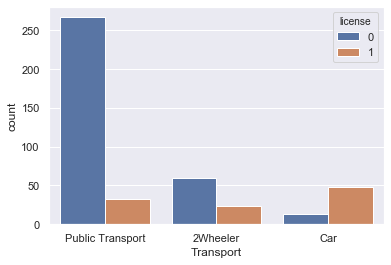

In [29]:
# Barplot of Transport with respect to Engineer
sns.countplot("Transport", hue="license", data=cars)
plt.show()

- 21% of employees using **Car** for travel do not have license.
- 72% of employees using **2Wheeler Transport** for travel do not have license.
- 89% of employees using **Public Transport** for travel do not have license.

<a id='missing'></a>

## Missing value Treatment

In [30]:
# As only 1 value in MBA variable is missing lets drop that row.
cars_new = cars.dropna(axis=0)
cars_new.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

<a id='outlier_treatment'></a>

## Outlier Treatment

In [31]:
# Write function to detect outliers
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outlier_indices = list(x.index[(x < lower_bound) | (x > upper_bound)])
    outlier_values = list(x[outlier_indices])
    
    print ("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)
    print("Outliers:" ,outlier_values)

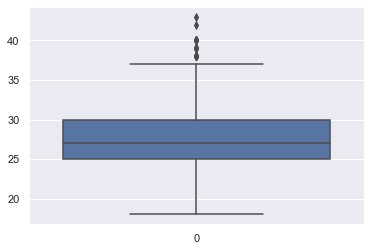

In [32]:
# Check for outliers - Age
sns.boxplot(data=cars["Age"])
plt.show()

In [33]:
find_outliers(cars["Age"])

Lower bound: 17.5
Upper bound: 37.5
Outliers: [39, 39, 39, 38, 40, 38, 38, 38, 38, 40, 40, 39, 40, 38, 39, 38, 40, 39, 38, 42, 40, 43, 40, 38, 39]


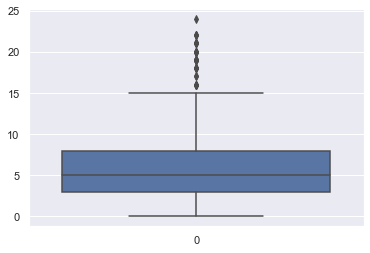

In [34]:
# Check for outliers - Work Exp
sns.boxplot(data=cars["Work Exp"])
plt.show()

In [35]:
find_outliers(cars["Work Exp"])

Lower bound: -4.5
Upper bound: 15.5
Outliers: [19, 16, 21, 17, 16, 18, 19, 18, 21, 16, 19, 19, 18, 19, 20, 22, 16, 20, 18, 21, 20, 20, 16, 17, 21, 18, 20, 21, 19, 22, 22, 19, 24, 20, 19, 19, 19, 21]


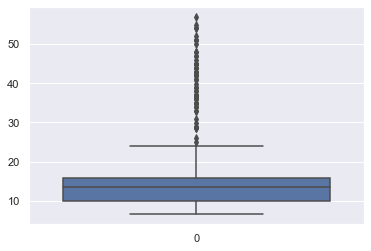

In [36]:
# Check for outliers - Salary
sns.boxplot(data=cars["Salary"])
plt.show()

In [37]:
find_outliers(cars["Salary"])

Lower bound: 0.912500000000005
Upper bound: 24.612499999999994
Outliers: [36.6, 38.9, 25.9, 34.8, 28.8, 39.9, 39.0, 28.7, 36.9, 28.7, 34.9, 47.0, 28.8, 36.9, 54.0, 29.9, 34.9, 36.0, 44.0, 37.0, 24.9, 43.0, 37.0, 54.0, 44.0, 34.0, 48.0, 42.0, 51.0, 45.0, 34.0, 28.8, 45.0, 42.9, 41.0, 40.9, 30.9, 41.9, 43.0, 33.0, 36.0, 33.0, 38.0, 46.0, 45.0, 48.0, 35.0, 51.0, 51.0, 55.0, 45.0, 42.0, 52.0, 38.0, 57.0, 44.0, 45.0, 47.0, 50.0]


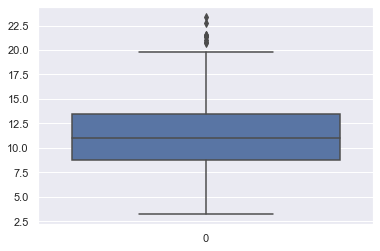

In [38]:
# Check for outliers - Distance
sns.boxplot(data=cars["Distance"])
plt.show()

In [39]:
find_outliers(cars["Distance"])

Lower bound: 1.8625000000000007
Upper bound: 20.3625
Outliers: [20.7, 20.8, 21.0, 21.3, 21.4, 21.5, 21.5, 22.8, 23.4]


- There are outliers in all numerical variables which are above and below 1.5 IQR, but they are not very extreme values.
- Let's keep the outliers and proceed with model building.

<a id='variable_importance_check'></a>

## Variable Importance Check

In [40]:
# Calculate VIF (Variance Inflation Factor)
# Import function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the variables for VIF
X = cars_new.loc[:,['Age', 'Work Exp', 'Salary','Distance']]

# Adding Intercept term which represent a constant
# As OLS, which is used in the python variance inflation factor calculation, does not add an intercept by default
X["Intercept"] = 1  

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

   variables         VIF
0        Age    7.677817
1   Work Exp   15.312352
2     Salary    8.309499
3   Distance    1.263222
4  Intercept  212.571304


- As we can see very high VIF for **Age**, **Work Exp** and **Salary**.
- We have observed earlier that **Work Exp** variable has high correlation with **Age** and **Salary**.
- Let's remove **Work Exp** variable and then check the VIF.

In [41]:
# Check VIF after removing Work Exp variable
X_new = cars_new.loc[:,['Age', 'Salary','Distance']]
X_new["Intercept"] = 1

vif_new = pd.DataFrame()
vif_new["variables"] = X_new.columns
vif_new["VIF"] = [variance_inflation_factor(X_new.values, i)for i in range (X_new.shape[1])]
print(vif_new)

   variables         VIF
0        Age    3.873928
1     Salary    4.215489
2   Distance    1.247685
3  Intercept  108.879473


- Now VIF for all the variables is around 4 or less, which is good.
- Let's remove **Work Exp** variable and proceed with model building.

In [42]:
# Remove Work Exp variable
cars_new = cars_new.drop("Work Exp", axis=1)

In [43]:
# Make a copy of car_new before data preprocessing
cars_copy = cars_new.copy()

<a id='data_preparation'></a>

## Data Preparation for Modelling

In [44]:
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
Age          443 non-null int64
Gender       443 non-null object
Engineer     443 non-null object
MBA          443 non-null object
Salary       443 non-null float64
Distance     443 non-null float64
license      443 non-null object
Transport    443 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 31.1+ KB


In [45]:
# Lets change Engineer, license & MBA(float variable) to int64
cars_copy["Engineer"] = cars_copy["Engineer"].astype("int64")
cars_copy["license"] = cars_copy["license"].astype("int64")
cars_copy["MBA"] = cars_copy["MBA"].astype("int64")
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
Age          443 non-null int64
Gender       443 non-null object
Engineer     443 non-null int64
MBA          443 non-null int64
Salary       443 non-null float64
Distance     443 non-null float64
license      443 non-null int64
Transport    443 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 31.1+ KB


In [46]:
# Check head of data set
cars_copy.head()

,Age,Gender,Engineer,MBA,Salary,Distance,license,Transport
0,28,Male,0,0,14.3,3.2,0,Public Transport
1,23,Female,1,0,8.3,3.3,0,Public Transport
2,29,Male,1,0,13.4,4.1,0,Public Transport
3,28,Female,1,1,13.4,4.5,0,Public Transport
4,27,Male,1,0,13.4,4.6,0,Public Transport


In [47]:
# Get dummy coding for the variables (including dependent variable as we need only Ttansport_Car variable for prediction) 
cars_copy = pd.get_dummies(cars_copy, drop_first=True)
cars_copy.head()

,Age,Engineer,MBA,Salary,Distance,license,Gender_Male,Transport_Car,Transport_Public Transport
0,28,0,0,14.3,3.2,0,1,0,1
1,23,1,0,8.3,3.3,0,0,0,1
2,29,1,0,13.4,4.1,0,1,0,1
3,28,1,1,13.4,4.5,0,0,0,1
4,27,1,0,13.4,4.6,0,1,0,1


In [48]:
# Lets dron Transport_Public Transport variable
cars_final = cars_copy.drop("Transport_Public Transport", axis=1)

In [49]:
cars_final.head()

,Age,Engineer,MBA,Salary,Distance,license,Gender_Male,Transport_Car
0,28,0,0,14.3,3.2,0,1,0
1,23,1,0,8.3,3.3,0,0,0
2,29,1,0,13.4,4.1,0,1,0
3,28,1,1,13.4,4.5,0,0,0
4,27,1,0,13.4,4.6,0,1,0


In [50]:
# Chech info of data set
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
Age              443 non-null int64
Engineer         443 non-null int64
MBA              443 non-null int64
Salary           443 non-null float64
Distance         443 non-null float64
license          443 non-null int64
Gender_Male      443 non-null uint8
Transport_Car    443 non-null uint8
dtypes: float64(2), int64(4), uint8(2)
memory usage: 25.1 KB


In [51]:
# Seperate dependent & independent variables
cars_x = cars_final.drop("Transport_Car", axis = 1)
cars_y = cars_final["Transport_Car"]

In [52]:
# Check head of independent variables
cars_x.head()

,Age,Engineer,MBA,Salary,Distance,license,Gender_Male
0,28,0,0,14.3,3.2,0,1
1,23,1,0,8.3,3.3,0,0
2,29,1,0,13.4,4.1,0,1
3,28,1,1,13.4,4.5,0,0
4,27,1,0,13.4,4.6,0,1


In [53]:
# Check head of dependent variable
cars_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Transport_Car, dtype: uint8

In [54]:
# Get train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(cars_x, cars_y, test_size=0.3, random_state=123)

In [55]:
print(x_train.shape, x_test.shape)

(310, 7) (133, 7)


In [56]:
print(y_train.shape, y_test.shape)

(310,) (133,)


<a id='modelling'></a>

## Modelling

<a id='knn'></a>

## KNN

In [57]:
# Run KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
# Get prediction on the train data and check accuracy
pred_train_knn = knn.predict(x_train)

In [59]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix
conf_train_knn = confusion_matrix(y_train, pred_train_knn)
print(conf_train_knn)

[[264   0]
 [  4  42]]


- **True Positive (TP)** - 42 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 264 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 0 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 4 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [60]:
# Check Accuracy
from sklearn.metrics import classification_report
report_train_knn = classification_report(y_train, pred_train_knn)
print(report_train_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.91      0.95        46

    accuracy                           0.99       310
   macro avg       0.99      0.96      0.97       310
weighted avg       0.99      0.99      0.99       310



- **Accuracy** - 99% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 91% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 100% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 95% (Harmonic mean between Precision & Recall)

In [61]:
# Let's predict on test data
pred_test_knn = knn.predict(x_test)
conf_test_knn = confusion_matrix(y_test, pred_test_knn)
print(conf_test_knn)

[[118   0]
 [  3  12]]


- **True Positive (TP)** - 12 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 118 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 0 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 3 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [62]:
# Check Accuracy
report_test_knn = classification_report(y_test, pred_test_knn)
print(report_test_knn)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.80      0.89        15

    accuracy                           0.98       133
   macro avg       0.99      0.90      0.94       133
weighted avg       0.98      0.98      0.98       133



- **Accuracy** - 98% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 80% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 100% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 89% (Harmonic mean between Precision & Recall)
- Accuracy of 98% in test data is almost near to accuracy of train data which is 99%.

In [63]:
# Store predicted probabilities of class 1
knn_prob = knn.predict_proba(x_test)[:,1]

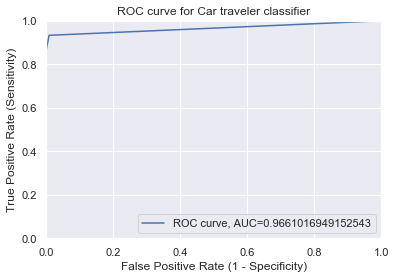

In [64]:
# Get (Receiver operating characteristic)ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, knn_prob)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 96.6%

<a id='nb'></a>

## Naive Bayes

In [65]:
# Run Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
# Get prediction on the train data and check accuracy
pred_train_nb = nb.predict(x_train)

In [67]:
# Check confusion matrix
conf_train_nb = confusion_matrix(y_train, pred_train_nb)
print(conf_train_nb)

[[257   7]
 [  8  38]]


- **True Positive (TP)** - 38 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 257 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 7 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 8 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [68]:
# Check Accuracy
report_train_nb = classification_report(y_train, pred_train_nb)
print(report_train_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.91      0.95        46

    accuracy                           0.99       310
   macro avg       0.99      0.96      0.97       310
weighted avg       0.99      0.99      0.99       310



- **Accuracy** - 99% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 91% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 97% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 95% (Harmonic mean between Precision & Recall)

In [69]:
# Let's predict on test data
pred_test_nb = nb.predict(x_test)
conf_test_nb = confusion_matrix(y_test, pred_test_nb)
print(conf_test_nb)

[[115   3]
 [  3  12]]


- **True Positive (TP)** - 12 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 115 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 3 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 3 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [70]:
# Check Accuracy
report_test_nb = classification_report(y_test, pred_test_nb)
print(report_test_nb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.80      0.80      0.80        15

    accuracy                           0.95       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.95      0.95      0.95       133



- **Accuracy** - 95% (Overall classification accuracy)
- **Precision** - 80% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 80% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 97% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 80% (Harmonic mean between Precision & Recall)
- Accuracy on train is 99% and on test data it is 95%.

In [71]:
# Check the class distribution of testing set
y_test.value_counts()

0    118
1     15
Name: Transport_Car, dtype: int64

- Class distribution is **'0'** - 89% and **'1'** - 11%

In [72]:
# Store predicted probabilities of class 1
nb_prob = nb.predict_proba(x_test)[:,1]

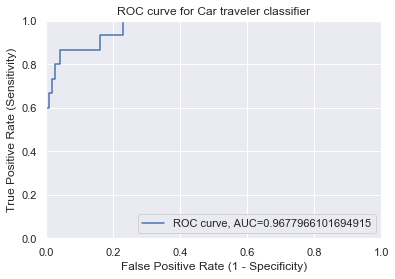

In [73]:
# Get (Receiver operating characteristic)ROC curve
auc = roc_auc_score(y_test, nb_prob)
fpr, tpr, thresholds = roc_curve(y_test, nb_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 96.7%

<a id='lr'></a>

## Logistic Regression

In [74]:
# Run Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Get prediction on the train data and check accuracy
pred_train_lr = lr.predict(x_train)

In [76]:
# Check confusion matrix
conf_train_lr = confusion_matrix(y_train, pred_train_lr)
print(conf_train_lr)

[[262   2]
 [ 13  33]]


- **True Positive (TP)** - 33 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 262 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 2 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 13 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [77]:
# Check Accuracy
report_train_lr = classification_report(y_train, pred_train_lr)
print(report_train_lr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       264
           1       0.94      0.72      0.81        46

    accuracy                           0.95       310
   macro avg       0.95      0.85      0.89       310
weighted avg       0.95      0.95      0.95       310



- **Accuracy** - 95% (Overall classification accuracy)
- **Precision** - 94% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 72% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 99% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 81% (Harmonic mean between Precision & Recall)

In [78]:
# Let's predict on test data
pred_test_lr = lr.predict(x_test)
conf_test_lr = confusion_matrix(y_test, pred_test_lr)
print(conf_test_lr)

[[116   2]
 [  4  11]]


- **True Positive (TP)** - 11 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 116 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 2 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 4 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [79]:
# Check Accuracy
report_test_lr = classification_report(y_test, pred_test_lr)
print(report_test_lr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       118
           1       0.85      0.73      0.79        15

    accuracy                           0.95       133
   macro avg       0.91      0.86      0.88       133
weighted avg       0.95      0.95      0.95       133



- **Accuracy** - 95% (Overall classification accuracy)
- **Precision** - 85% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 73% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 98% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 79% (Harmonic mean between Precision & Recall)
- Accuracy on both train and test data is 95%.

In [80]:
# Store predicted probabilities of class 1
lr_prob = lr.predict_proba(x_test)[:,1]

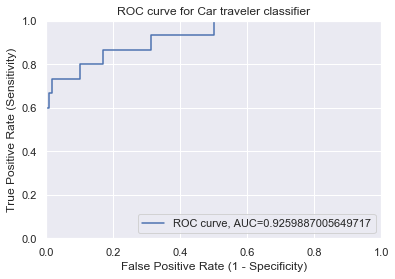

In [81]:
# Get (Receiver operating characteristic)ROC curve
auc = roc_auc_score(y_test, lr_prob)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 95.6%

### Comparing all 3 Model results
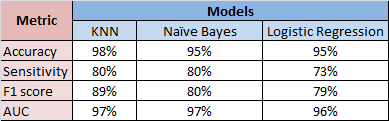

- **Sensitivity** is important for us as we want to predict Car travelers as correctly as possible.
- KNN Model with 5 neighbours gave the best prediction result with 98% **Accuracy**, 80% **Sensitivity** and **AUC** of 97%


<a id='bag'></a>

## Bagging

In [82]:
# Run Bagging with default base estimator as Decision tree
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [83]:
# Get prediction on the train data and check accuracy
pred_train_bag = bag.predict(x_train)

In [84]:
# Check confusion matrix
conf_train_bag = confusion_matrix(y_train, pred_train_bag)
print(conf_train_bag)

[[263   1]
 [  1  45]]


- **True Positive (TP)** - 45 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 263 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 1 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 1 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [85]:
# Check Accuracy
report_train_bag = classification_report(y_train, pred_train_bag)
print(report_train_bag)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       0.98      0.98      0.98        46

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



- **Accuracy** - 99% (Overall classification accuracy)
- **Precision** - 98% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 98% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 99.6% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 98% (Harmonic mean between Precision & Recall)

In [86]:
# Let's predict on test data
pred_test_bag = bag.predict(x_test)
conf_test_bag = confusion_matrix(y_test, pred_test_bag)
print(conf_test_bag)

[[118   0]
 [  3  12]]


- **True Positive (TP)** - 12 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 118 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 0 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 3 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [87]:
# Check Accuracy
report_test_bag = classification_report(y_test, pred_test_bag)
print(report_test_bag)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.80      0.89        15

    accuracy                           0.98       133
   macro avg       0.99      0.90      0.94       133
weighted avg       0.98      0.98      0.98       133



- **Accuracy** - 98% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 80% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 100% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 89% (Harmonic mean between Precision & Recall)
- Accuracy on train data is 99% and on test data it is 98%.

In [88]:
# Store predicted probabilities of class 1
bag_prob = bag.predict_proba(x_test)[:,1]

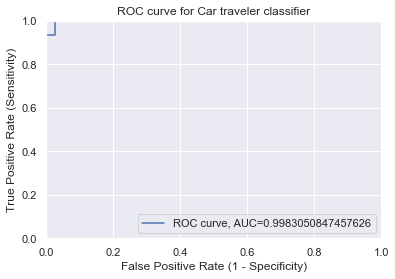

In [89]:
# Get (Receiver operating characteristic)ROC curve
auc = roc_auc_score(y_test, bag_prob)
fpr, tpr, thresholds = roc_curve(y_test, bag_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 99.8%

<a id='boost'></a>

## Boosting - Gradient Boosting Classifier

In [90]:
# Run Gradient Boosting Classifier with default base estimator as Decision tree
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
# Get prediction on the train data and check accuracy
pred_train_gb = gb.predict(x_train)

In [92]:
# Check confusion matrix
conf_train_gb = confusion_matrix(y_train, pred_train_gb)
print(conf_train_gb)

[[264   0]
 [  0  46]]


- **True Positive (TP)** - 46 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 264 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 0 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 0 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [93]:
# Check Accuracy
report_train_gb = classification_report(y_train, pred_train_gb)
print(report_train_gb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        46

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



- **Accuracy** - 100% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 100% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 100% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 100% (Harmonic mean between Precision & Recall)

In [94]:
# Let's predict on test data
pred_test_gb = gb.predict(x_test)
conf_test_gb = confusion_matrix(y_test, pred_test_gb)
print(conf_test_gb)

[[118   0]
 [  4  11]]


- **True Positive (TP)** - 11 employees who traveled by Car were predicted *correctly*.
- **True Negative (TN)** - 118 employees who do not traveled by Car were predicted *correctly*.
- **False Positive (FP)** - 0 employees who traveled by Car were predicted *incorrectly*. **(Type 1 error)**
- **False Negaitive (FN)** - 4 employees who do not traveled by Car were predicted *incorrectly*. **(Type 2 error)**

In [95]:
# Check Accuracy
report_test_gb = classification_report(y_test, pred_test_gb)
print(report_test_gb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.73      0.85        15

    accuracy                           0.97       133
   macro avg       0.98      0.87      0.91       133
weighted avg       0.97      0.97      0.97       133



- **Accuracy** - 97% (Overall classification accuracy)
- **Precision** - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- **Recall / Sensitivity / True Positive Rate** - 73% (When actually employee travel by Car, how often is the prediction correct?)
- **Specificity:** *TN / (TN+FP)* - 100% (When actually  employee do not travel by Car, how often is the prediction correct?)
- **F1 score** - 85% (Harmonic mean between Precision & Recall)
- Accuracy on train data is 100% and on test data it is 97%.

In [96]:
# Store predicted probabilities of class 1
gb_prob = gb.predict_proba(x_test)[:,1]

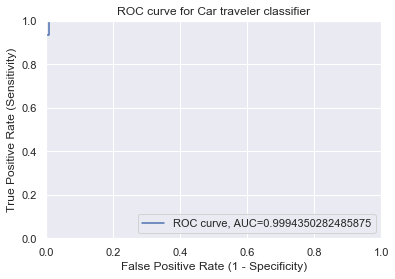

In [97]:
# Get (Receiver operating characteristic)ROC curve
auc = roc_auc_score(y_test, gb_prob)
fpr, tpr, thresholds = roc_curve(y_test, gb_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- Area Under the Curve is 99.9%

<a id='variable_importance'></a>

## Variable Importance

In [98]:
# Get variable importance
from sklearn.feature_selection import SelectKBest, chi2
imp_feature = SelectKBest(chi2, k="all").fit(x_train, y_train)

In [99]:
# List important variables as per their score
imp_features_df = pd.DataFrame({'Feature':list(x_train.columns),'Scores':imp_feature.scores_})
imp_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
3,Salary,1313.565169
0,Age,118.709481
4,Distance,81.281603
5,license,78.060476
6,Gender_Male,0.897088
1,Engineer,0.589946
2,MBA,0.010984


### Comparing KNN with Bagging and Boosting Model results
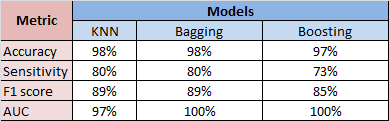

- KNN Model and Bagging model have performed best with 98% **Accuracy**, 80% **Sensitivity**.
- For Boosting **Sensitivity** is only 73% on test data. 

<a id='conclusion'></a>

## Conclusion

- Due to **multicollinearity** issue, **Work Exp** variable with high VIF was removed before model building.
- As this project aims to predict employees travelling in Car or not, So **Car** variable is encoded as **'1'** and other mode of transport (**2Wheeler** and **Public Transport**) are encoded as **'0'**.
- KNN model with 5 neighbours and Bagging model performed best with most correct predictions:
    - Accuracy for both - 98%
    - Sensitivity for both - 80%
    - AUC for KNN - 97% and AUC for Bagging - 99.9%
- Model **Accuracy** of **KNN** on train data is 99% and **Sensitivity** is 91%.
- Model **Accuracy** of **Bagging** on train data is 99% and **Sensitivity** is 98%.
- **Boosting** model did extremely well in training data with 100% **Accuracy**, but the performance in test data was low as we got **Accuracy** of 97% and **Sensitivity** of only 73%.
- **Boosting** model is overfitting.
- Most important feature for the prediction of Car travelers is **Salary** followed by **Age** and **Distance**.
- Almost all the employees who are above the **Age** of 30 years and also getting **Salary** more than 30 travels in **Car**.  